## Introduction to NumPy and Matplotlib

[Numpy](https://numpy.org/) is an essential Python package for carrying out the calculations needed for linear algebra as well as other areas of scientific computing.  [Matplotlib](https://matplotlib.org/) is a extensive Python package for producing a wide variety of plots.  In this section we will demonstrate a few of the basic elements of these packages that will be used repeatedly throughout the Jupyter Guide to Linear Algebra.  

It should be noted that NumPy is used for many of the actual calculations encounted in linear algebra, while we use Matplotlib only to make useful visual representations of the concepts.  The ability to use NumPy therefore will be crucial, while the understanding of Matplotlib is not explicitly required to engage with the content of the guide.  The Matplotlib demonstration below also contains more complex details that might be difficult to digest until the reader gains some experience with Python.  For these reasons, The reader may choose to skip the introduction to Matplotlib and return at a later point if interest arises. 



### NumPy

Almost every calculation that we do in linear algebra will involve working with arrays of numbers.  An array can be thought of as a collection of numbers arranged into rows and columns to form a rectangle, such as the example below, which has 2 rows and 4 columns.


$$
\begin{equation}
\left[ \begin{array}{rrrr} 5 & -1 & 1 & 0 \\ 4 & 3 & 12 & -6 \end{array}\right]
\end{equation}
$$

Although it is possible to represent arrays using a basic Python objects called lists, we will make use of NumPy array objects for our work.  NumPy has a powerful way to represent arrays, and has many built-in tools for processing them efficiently.  Just as with the math module, we have to first import NumPy before we can use it.  This time we will use the code $\texttt{import numpy as np}$, which imports the module but gives it a different name, called an alias, that is more convenient to type. 

The easiest way to create the array above is to use the $\texttt{array}$ function, and provide it a list of all the array entries in a specific format.  The row entries are separated by commas and enclosed in square brackets \[\], then all the rows listed together, separated by commas, and enclosed in another set of square brackets.   

In [17]:
import numpy as np

## The object [[5, -1, 1, 0],[4, 3, 12, -6]], which gets passed into the array function is a Python list.
## The object returned by the array function is a NumPy array object.

A = np.array([[5, -1, 1, 0],[4, 3, 12, -6]])

print(A)

[[ 5 -1  1  0]
 [ 4  3 12 -6]]


Another way to create the array we want is to first make an array that is one long row, and then use the $\texttt{reshape}$ function.  This can be more convenient than typing the extra square brackets. 

In [18]:
B = np.array([5, -1, 1, 0, 4, 3, 12, -6])
print("This is B before reshaping.")
print(B)

C = B.reshape((2,4))
print("This is C, which is the entries of B formed into a new shape.")
print(C)

This is B before reshaping.
[ 5 -1  1  0  4  3 12 -6]
This is C, which is the entries of B formed into a new shape.
[[ 5 -1  1  0]
 [ 4  3 12 -6]]


We will often wish to make modifications to an array while keeping a copy of the original.  In this situation we can duplicate an existing array with the $\texttt{copy}$ function.

In [19]:
D = np.copy(A)
print(D)

[[ 5 -1  1  0]
 [ 4  3 12 -6]]


In order to access individual entries in an array, we need to use a pair of indices to refer to the row and column of the entry we are accessing.  As with almost every other computing language, the count begins at zero in Python!  This means that the first row has index 0, the second has index 1 and so forth.  The same is true for the columns.  Beginning the count at zero is not difficult, but it does require an adjustment in thinking if one is new to programming.  

In [20]:
print(A[0,2])

1


We can modify individual array values by assigning them new numbers.

In [21]:
A[0,2] = 8
print(A)

[[ 5 -1  8  0]
 [ 4  3 12 -6]]


Sometimes it is useful to create an array that contains mostly zeros.  In this case, we can create an array that contains all zeros, and then modify the few entries that we want to be nonzero.

In [22]:
## Create a 4x4 array that is all zeros.
D = np.zeros((4,4))
## Set entries along the main diagonal to 2.
for i in range(4):
    D[i,i] = 2
    
print(D)

[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 2.]]


Many of the functions included in NumPy relate to linear algebra in some way.  We will demonstrate more of these functions as we make our way through the corresponding linear algebra topics.

#### Random module

One way of testing code is to supply a lot of random input, and then check to see if the correct results are produced in each instance.  To produce the random inputs, we will make use of functions in the $\texttt{random}$ module, which is contained within NumPy.  For example, we might use the $\texttt{rand}$ function with no arguments to produce a random number between zero and one.     

In [23]:
r = np.random.rand()
print(r)

0.09157342381121303


Each execution of the $\texttt{rand}$ function yields a new random number.  Note that $\texttt{rand}$ is a function contained in the $\texttt{random}$ module, which is in turn contained in NumPy.  We therefore need do use the dot notation twice to access it.

We can also generate a random array of numbers by supplying $\texttt{rand}$ two arguments to specify the number of rows and columns in the array.
  

In [24]:
X = np.random.rand(3,2)
print(X)

[[0.41811285 0.38713771]
 [0.15046676 0.54637126]
 [0.1994451  0.05002023]]


If we want to generate random integers, we can use the $\texttt{randint}$ function.  This function requires at least one argument to specify an upper bound on the numbers produced.  The code below produces a random number from among the integers 0 to 19.  

In [25]:
print(np.random.randint(20))

12


To generate a random array we have to specify the number of rows and columns using a *keyword argument* called $\texttt{size}$.  The use of a *keyword argument* requires slightly different syntax as shown in the following example.

In [26]:
Y = np.random.randint(10,size=(3,6))
print(Y)

[[8 1 5 1 9 3]
 [1 1 5 9 6 3]
 [3 3 4 0 7 0]]


The use of *keyword arguments* is quite common in Python functions.  The advantage of this feature is that the arguments do not need to be provided in a prespecified order.

In [27]:
print(np.random.randint(size=(2,3),high=10,low=1))

[[6 5 8]
 [6 4 5]]


There is also a function in the $\texttt{random}$ module called $\texttt{choice}$, which allows us to generate a random value chosen from a specified collection.  This function takes a list of numbers as an argument and returns a value chosen at random from that list.

In [28]:
x = np.random.choice([0,3,7,42])
print(x)

7


We can also use the $\texttt{choice}$ function to generate an array of numbers consisting of values from the specified collection. This is done by again using the $\texttt{size}$ keyword argument.

In [29]:
X = np.random.choice([0,3,7,42], size = (2,3))
print(X)

[[ 3  7  0]
 [42  7  3]]


### SciPy

The SciPy library contains robust and efficient functions for a range of purposes related to scientific computing.  We will be making use of the $\texttt{linalg}$ module, which contains many routines useful in linear algebra.  We note that some of the code in the Jupyter Guide to Linear Algebra duplicates functionality found in the $\texttt{linalg}$ module, but this code is not meant to be a reliable alternative.  The code presented here is written for the purpose of explaining the theory of linear algebra and giving a simple illustration of what is required to carry out the typical calculations required.  

We will wait to demonstrate the functions in the $\texttt{linalg}$ module until after we have discussed enough linear algebra to understand their purpose.  The module will be imported with the alias $\texttt{sla}$.  

In [30]:
import scipy.linalg as sla

### Matplotlib

Matplotlib provides a wide range of plotting functionality, and many options to make precise customizations to the figures produced. We only provide explanations for how to create the specific type of figures that appear in the Jupyter Guide to Linear Algebra, most of which follow the same essential pattern.  We will provide a few details of the necessary code, but will not attempt to describe the data structures in a rigorous way, or discuss the multitude of options that are available within the library.    

#### Example 1

In the first figure, we will make a simple plot of four points with $(x,y)$ coordinates.  The list of coordinates will be stored in a NumPy array.

In [31]:
x = np.array([1, 2.5, 3, 5.8])
y = np.array([2, 1.2, 1.1, 0.8])

The next code cell contains a minimal set of instructions needed to produce a plot.  The comments in the cell indicate the purpose of each line.

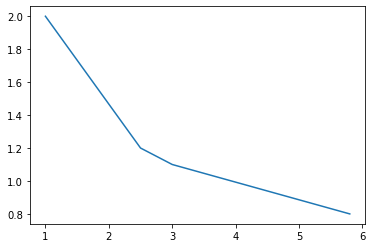

In [32]:
## Imports the module and assigns a short alias for convenience
import matplotlib.pyplot as plt

## Directs the graphical output to this notebook
%matplotlib inline

## The subplots method returns a Figure object and an Axes object
fig, ax = plt.subplots()

## Plots the data on the Axes object
ax.plot(x,y);

The $\texttt{subplots}$ method creates two Matplotlib objects, the *Figure*, and the *Axes*.  The *Figure* is the fundamental object in Matplotlib.  The *Axes* object is contained within the *Figure*, and is the object we will interact with the most.  The $\texttt{plot}$ method of the *Axes* object is the function that actually plots our set of coordinates on the *Axes*.  Note that we do not need a $\texttt{print}$ command to view the results.  Instead, the first line of code, $\texttt{% matplotlib inline}$, directs all graphical output to this notebook.

The plot produced by this basic use of the $\texttt{plot}$ method has connected the data point coordinates with lines.  This is the *default* functionality of this method.  It is common for Matplotlib methods (and indeed methods in many other Python libraries) to have a default functionality which is produced by supplying the minimum number of arguments, but also allow for additional arguments to be supplied which alter this default functionality.  In our example, we can supply the optional argument $\texttt{'b+'}$ to the $\texttt{plot}$ method to produce a plot with blue + symbols at the data coordinates instead of lines connecting them.   

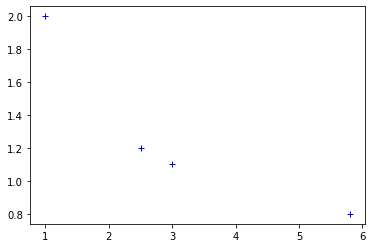

In [33]:
fig, ax = plt.subplots()
ax.plot(x,y,'b+');

Another alternative when we are interested in plotting data points is the $\texttt{scatter}$ method, for which we can use the same syntax.

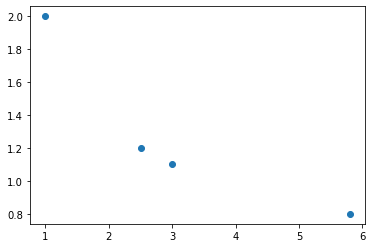

In [34]:
fig, ax = plt.subplots()
ax.scatter(x,y);

Next, we show how to configure some of the many options available in such a plot.  Remember that the plot is actually being constructed in an *Axes* object, so all the options that affect elements of the plot are methods of that object.

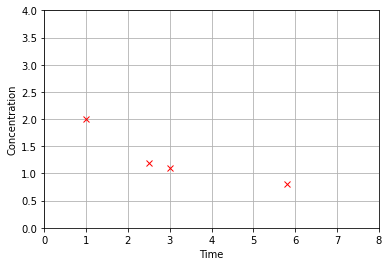

In [35]:
fig, ax = plt.subplots()
ax.plot(x,y,'rx');

## These options set the upper and lower boundaries for x and y.
ax.set_xlim(0,8);
ax.set_ylim(0,4);

## This option displays a grid to help visualize the coordinates
ax.grid(True);

## These options are used to set labels for the axes
ax.set_xlabel('Time');
ax.set_ylabel('Concentration');

#### Example 2

In the next example, the aim will be to plot the curve $y=0.5x^2$, for $x$ in the interval $[-2,4]$.  In order to make use of the same method, we will need to generate a set of points that lie on the curve for $x$ in the given interval.  The points that we specify will be connected by straight lines, so we will want to generate enough points to avoid the curve having a jagged appearance.  The NumPy method $\texttt{linspace}$ provides an easy way to produce our points.  This method creates a NumPy array object with numbers spaced evenly over a specified interval. 

In [36]:
## This call to linspace produces an array of 9 numbers evenly spaced on the interval [-2,4]
x = np.linspace(-2,4,9)
print(x)

## We can create an array of the corresponding y values by using x in the algebraic expression
y = 0.5*x**2
print(y)

[-2.   -1.25 -0.5   0.25  1.    1.75  2.5   3.25  4.  ]
[2.      0.78125 0.125   0.03125 0.5     1.53125 3.125   5.28125 8.     ]


For the plot, we will use a larger number of points in order to generate a curve that looks smooth.  We also use some other options to adjust the appearance of this plot, including configuration of the *ticks* along the $x$ and $y$ axes.  The *ticks* is a list of numbers that define the gridlines and numerical labels along the axes.  The $\texttt{plot}$ method will provide default values of *ticks*, which can be changed by providing an array of new values.    

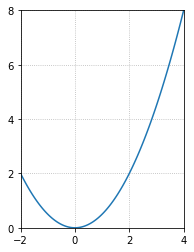

In [37]:
x = np.linspace(-2,4,100)
y = 0.5*x**2

fig, ax = plt.subplots()
ax.plot(x,y);

ax.set_xlim(-2,4);
ax.set_ylim(0,8);

## The grid option will accept the keyword argument ls, which specifies the linestyle
ax.grid(True,ls='dotted');

## This option adjusts the aspect ratio so that the x and y axes have the same length scale
ax.set_aspect('equal');

## The numbers and gridlines along the x and y axes appear at 
ax.set_xticks(np.linspace(-2,4,4));
ax.set_yticks(np.linspace(0,8,5));


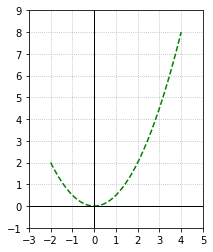

In [38]:
fig, ax = plt.subplots()
ax.plot(x,y,'g',ls='dashed');

ax.set_xlim(-3,5);
ax.set_ylim(-1,9);

## The grid option can be passed optional arguments that specify the linestyle (ls) used
ax.grid(True,ls='dotted');

## This option adjusts the aspect ratio so that the x and y axes have the same length scale
ax.set_aspect('equal');

## This option specifies the ticks with an array produced by linspace 
ax.set_xticks(np.linspace(-3,5,9));
ax.set_yticks(np.linspace(-1,9,11));

## This option draws lines x=0 and y=0 using keyword arguments color and linewidth
ax.axvline(color='k',linewidth = 1);
ax.axhline(color='k',linewidth = 1);

Throughout the Jupyter Guide to Linear Algebra, we will often hide the code used to produce the graphics in order to keep the pages tidy for reading.

### Exercises

- Using the $\texttt{random}$  module, create a NumPy array with 2 rows and 3 columns that has entries that are random positive integers less than 10.  Print your array. Change the entry in the first row, second column to 8 and double the value in the second row, third column. Print the resulting array to check that your code has made the correct modifications.

In [39]:
## Code solution here.

- Using the $\texttt{random}$  module, create a NumPy array with 3 rows and 3 columns that has entries that are random positive integers less than 10.  Print your array. Now multiply each value in the matrix by 5 and then add 1 to all the enteries in the second row. After that, divide each diagonal entry by 2 and print the resulting array to check that your code has made the correct modifications.

In [40]:
## Code solution here.

- Using the $\texttt{random}$  module, create a NumPy array with 2 rows and 3 columns that has entries that are random integers greater than 5 and less than 13.    Write code that sets all even entries of the matrix to zero.  Print the array and check the results.  Run the code several times to check that it works for *different* random arrays. 

In [41]:
## Code solution here.

- Create a NumPy array with 2 rows and 4 columns and assign it the name A.  Fill it with some values of your choice.  Create a new array $B$ that has the columns of $A$ as it's rows.  Print $A$ and $B$.  Below is an example of one such pair of arrays.

$$
\begin{equation}
A = \left[ \begin{array}{cccc} 1 & 0 & 5 & 1 \\ 3 & 2 & 0 & 8   \end{array}\right]\hspace{1cm}
B = \left[ \begin{array}{cc} 1 & 3 \\ 0 & 2 \\ 5 & 0  \\ 1 & 8  \end{array}\right]\hspace{1cm}
\end{equation}
$$

In [42]:
## Code solution here.

- Using matplotlib to plot the following points using the blue *cross* symbol: (2,1), (4,4), (8,16), (10,25).  Add a grid that consists of dotted lines as in Example 2. Set the limits of $x$-axis to 0 and 10.  Set the limits of the $y$-axis to 0 and 25.  The numbers and gridlines should appear at intervals of 2 units along the $x$-axis and at intervals of 5 units along the $y$-axis.  Label the $x$-axis as "*Time*" and the $y$-axis as "*Distance*".

In [43]:
## Code solution here.

- Use matplotlib to plot the curve $y= 4+x-0.5x^2$ where $x$ lies in the interval $[-1,5]$.  Follow Example 2 and use $\texttt{linspace}$ to generate an array of coordinates of points on the curve. The curve should be dashed and shown in green color. The numbers and gridlines should appear at intervals of 1 unit along the $x$-axis and at intervals of 3 units along the $y$-axis. Draw the lines $x=0$, and $y=0$ with black colour and 1 unit width. Add a grid that consists of dashed lines.

In [43]:
## Code solution here.

### References

- Harris, C. R. et. al. [*Array Programming with NumPy*](https://www.nature.com/articles/s41586-020-2649-2)., Nature 585, 357-362, 2020.
- [A Crash Course in Python for Scientists](https://nbviewer.jupyter.org/gist/rpmuller/5920182)
